# Working with data frames, cleaning, making predictions, and one-hot coding on categorical variables

### Scenerio
The client, a credit card company has brought a dataset that includes some domographics and recent financial data (the past 6 months) for a sample of 30,000 account holders.  This data is at the credit account level; in other words, there is one row for each account.  Rows are labeled by whether in the next month after the 6 month historical data period, and account owner has defaulted - failed to make minimum payment.

### Goal
To develop a predictive model for whether an account will default next month, given demographics and historical data.  

## Exploring the data

The original dataset is a modified version from the University of California, Irvine Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

obtained from:
http://archive.ics.uci.edu/ml

The modified data set used in this project can be found at:
http://bit.ly/2Hlk5t3

#### Pertinent questions to ask in exploration.
1. How many columns, rows in data?

2. What kind of features are there? (numerical, categorical, boolean)

3. What does the data look like in these features?  
   i.e. range of numeric    features, frequency of classes for categorical    variables
   
4. Are there any missing values?

#### Import packages, and load data.

In [1]:
import pandas as pd

In [2]:
#loading credit card data frame from excel
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

### Verifying basic data integrity.

In [3]:
# rows and columns in dataset
df.shape

(30000, 25)

In [4]:
# examine column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Some column descriptions
__LIMIT_BAL__ : Amount of credit provided (in New Taiwanest NT dollar), including individual consumer credit and the family credit.

__SEX__ : 1 = male; 2 = female

__EDUCATION__ : 1 = graduate school; 2 = university; 3 = high school; 
                4 = other

__MARRIAGE__ : 1 = married; 2 = single; 3 = other

__AGE__: in years

__PAY_1__ - __PAY_6__ : A record of past payments, from April to September            
                        PAY_1 = Sep; PAY_2 = Aug. etc.
        The measurement scale for the repayment status is as follows: 
        -1 = pay duly: 1 = payment dalay for 1 month; 2 = payment delay
        for 2 months; etc.
        
__BILL_AMT1__ - __BILL_AMT6__ : Bill statement amount (in NT dollar)
        BILL_AMT1 is bill in Sep; BILL_AMT2 is bill in Aug, etc.
        
__PAY_AMT1__ - __PAY_AMT6__ : Amount of previous payment (NT dollar). 
        PAY_AMT1 is amount paid in Sep; PAY_AMT2 for Aug; etc.

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df['ID'].nunique()

29687

The number of unique IDs is less than the number of rows, so ID is not a unique identifier.  

In [7]:
# store id counts as variable 'id_counts'
id_counts = df['ID'].value_counts()
id_counts.head()

ae6a7eed-bb58    2
0a37c2c7-6065    2
527c11ea-113e    2
51e5ff58-5a0f    2
1fb3e3e6-a68d    2
Name: ID, dtype: int64

In [8]:
# number of grouped duplicate entries - 313 IDs occur twice
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

#### Boolean Masks (logical mask)
Filter array or series according to a condition.
First using a synthetic array to illustrate concept.

In [9]:
# needed for generation of random numbers
import numpy as np

In [10]:
# array of 100 random integers ranging from 1 - 5; set seed for same 
# result on subsequent runs
np.random.seed(seed=24)
random_integers = np.random.randint(low=1, high=5, size=100)
random_integers[:5]


array([3, 4, 1, 4, 2])

In [11]:
#boolean mask for which elements are equal to 3 for first 5 elements
is_equal_to_3 = random_integers == 3
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [12]:
# how many elements are equal to 3?
sum(is_equal_to_3)

22

In [13]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
# indices where elements equal 3
np.where(random_integers[is_equal_to_3])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=int64),)

#### Back to using logical masks on original dataset

In [15]:
# create mask for duplicate ids
dupe_mask = id_counts == 2
dupe_mask[0:5]

ae6a7eed-bb58    True
0a37c2c7-6065    True
527c11ea-113e    True
51e5ff58-5a0f    True
1fb3e3e6-a68d    True
Name: ID, dtype: bool

In [16]:
#show 1st 5 ids
id_counts.index[0:5]

Index(['ae6a7eed-bb58', '0a37c2c7-6065', '527c11ea-113e', '51e5ff58-5a0f',
       '1fb3e3e6-a68d'],
      dtype='object')

In [17]:
#variable for duplicate ids
dupe_ids = id_counts.index[dupe_mask]


In [18]:
#convert to list then show length
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [19]:
# verify dup ids using list operations
dupe_ids[0:5]

['ae6a7eed-bb58',
 '0a37c2c7-6065',
 '527c11ea-113e',
 '51e5ff58-5a0f',
 '1fb3e3e6-a68d']

In [20]:
# filter the DataFrame to view all the columns for the first 3 duplicate ids
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4954,527c11ea-113e,340000,1,1,2,35,Not available,-1,-1,-1,...,7569,797,1211,2873,0,7591,799,1214,18309,0
5054,527c11ea-113e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11731,ae6a7eed-bb58,20000,1,2,1,51,0,0,0,0,...,18235,16259,10640,1355,1136,646,381,337,1251,0
11831,ae6a7eed-bb58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12400,0a37c2c7-6065,130000,1,1,2,27,-1,-1,2,0,...,922,-693,-2292,3747,0,0,0,0,10000,0
12500,0a37c2c7-6065,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It appears that one row for each duplicate id contains all 0s.

In [21]:
#mask for 0s
df_zero_mask = df == 0

In [22]:
#boolean series for 0s, but exclude id values, since they are not 0
# : for all rows; 1: for all cols after 1st col
# all(axis=1) returns True iff every column in that row is True
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)
#we find that there are 2 non-duplicate rows of 0s (315-313=2)

315

In [23]:
#remove rows with all 0s
#copy() saves as data frame, not just a view
# ~ not, select all rows with non-0 entries
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

#number of rows and cols
df_clean_1.shape

(29685, 25)

In [24]:
#verify number of cols (unique ids)
df_clean_1['ID'].nunique()

29685

The number of unique ids is equal to the number of rows after
removing all 0s.

#### Exploring and cleaning the data

In [25]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

Why is PAY_1 object and not int?

In [26]:
df_clean_1['PAY_1'].head(5)

#0 values are not in data dict. ie vals should be -1,1,2 etc.

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [27]:
df_clean_1['PAY_1'].value_counts()

# Not avalable symbolizes missing data, not int, so that's why pandas imported as object

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [28]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [29]:
sum(valid_pay_1_mask)

26664

In [30]:
# create boolean series in same way as above when removing 0s rows
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [31]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [32]:
# cast object to int using astype
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


There are still values of -2, -1, and 0 in the Pay_1 col.  In a hypothetical scenerio, we reached out to a business partner to clarify and found that:

-2 : account started with 0 balance, and never used any credit

-1 : account had a balance that was paid in full

 0 : least minimum payment was made, but entire balance was not (positive      balance carried to next month)

### Data Quality Assurance and Exploration

#### Exploring the Credit Limit and Demographic Features

In [33]:
import matplotlib.pyplot as plt

#render plotting automatically
%matplotlib inline   

import matplotlib as mpl

#high resolution
mpl.rcParams['figure.dpi'] = 400  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C49050AA90>,
      dtype=object)

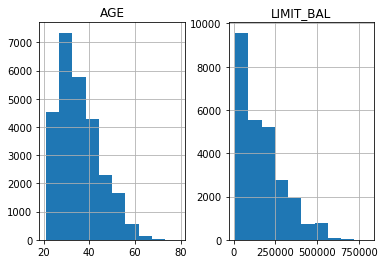

In [34]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [35]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [36]:
# looking at value counts for categorical features is useful
# since there are relatively few unique values
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [37]:
# group the unknown values of 0, 5, 6 with 4 for other
# inplace=True changes existing dataframe instead of making new one
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [38]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [39]:
# group unkown 0 with 3 for other
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

#### Categorical Features

Text(0.5, 0, 'Eduaction level: ordinal encoding')

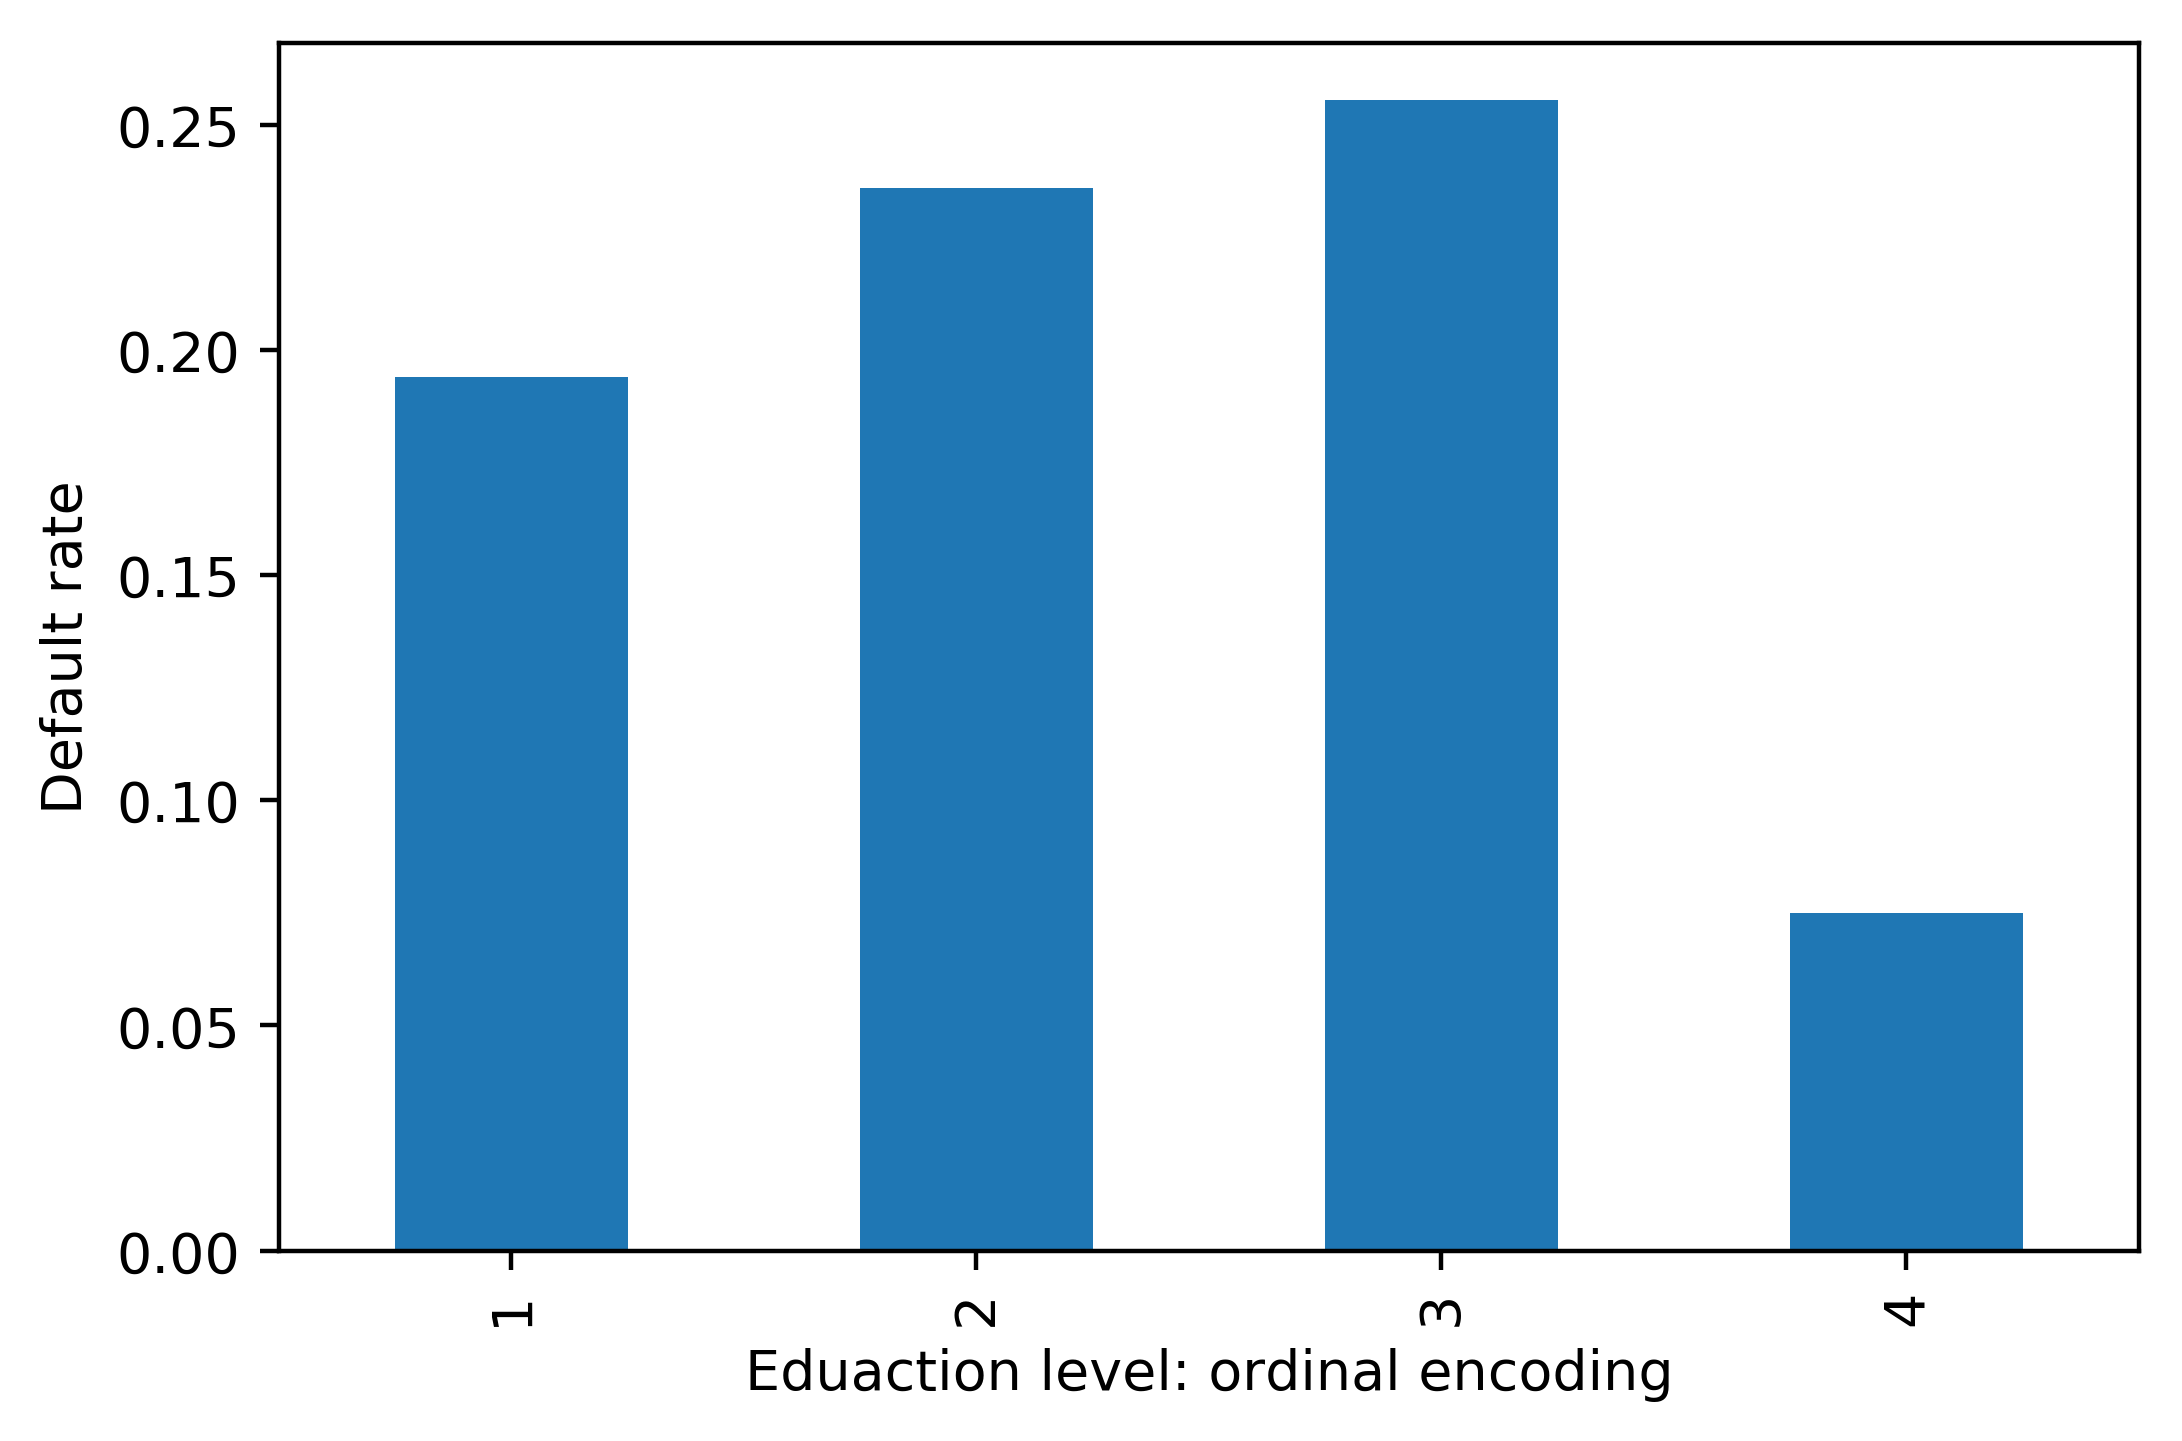

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

#render plotting automatically
%matplotlib inline   

import matplotlib as mpl

#high resolution
mpl.rcParams['figure.dpi'] = 400 

df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)

plt.ylabel('Default rate')
plt.xlabel('Eduaction level: ordinal encoding')

#### Implementing One Hot Encoding for a Categorical Feature

In [41]:
# create empty column for cat labels
df_clean_2['EDUCATION_CAT'] = 'none'

In [42]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [43]:
# create dictionary for mapping the education categories
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [44]:
# apply mapping using .map and assign it to EDUCATION_CAT col
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [45]:
# one-hot-encoding - pass a series of a dataframe to the get_dummies() function

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [46]:
# concatenate the OHE df and the original df_clean_2 df
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [47]:
df_with_ohe.to_csv('..Chapter_1_cleaned_data.csv', index=False)

### Exploring the Financial History Features in the Dataset

In [48]:
df = pd.read_csv('..Chapter_1_cleaned_data.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [49]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [50]:
df.shape

(26664, 30)

In [51]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3' ,'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [52]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

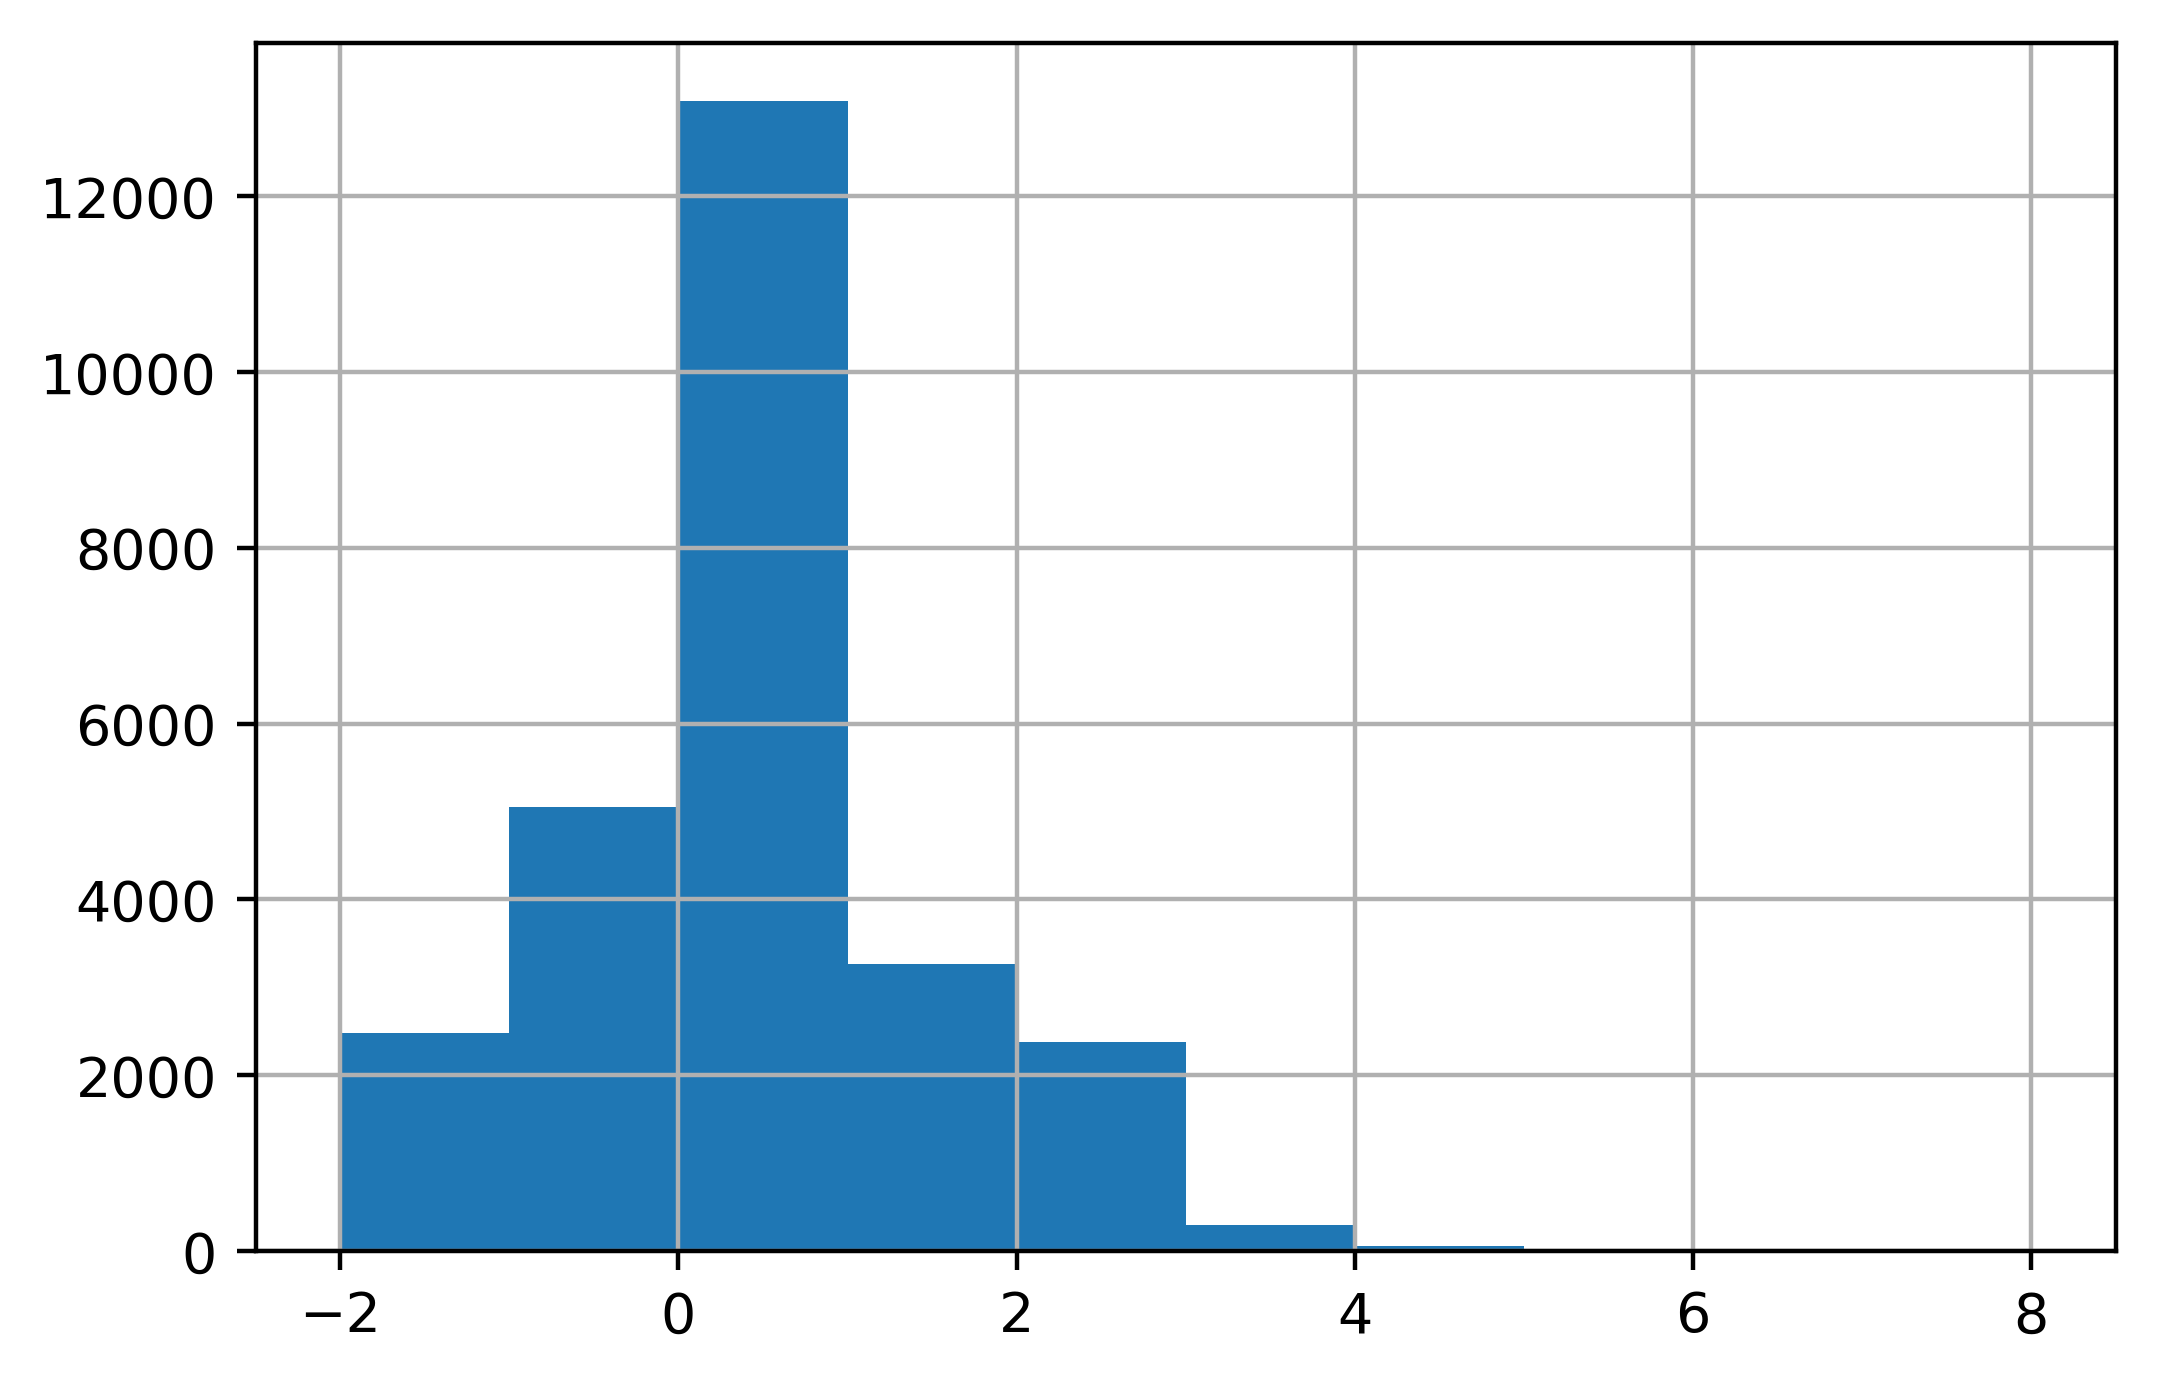

In [53]:
df[pay_feats[0]].hist()

In [54]:
# show left bin edges in histogram below moving to the left by 0.5
# for better visualization of discrete bin values
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

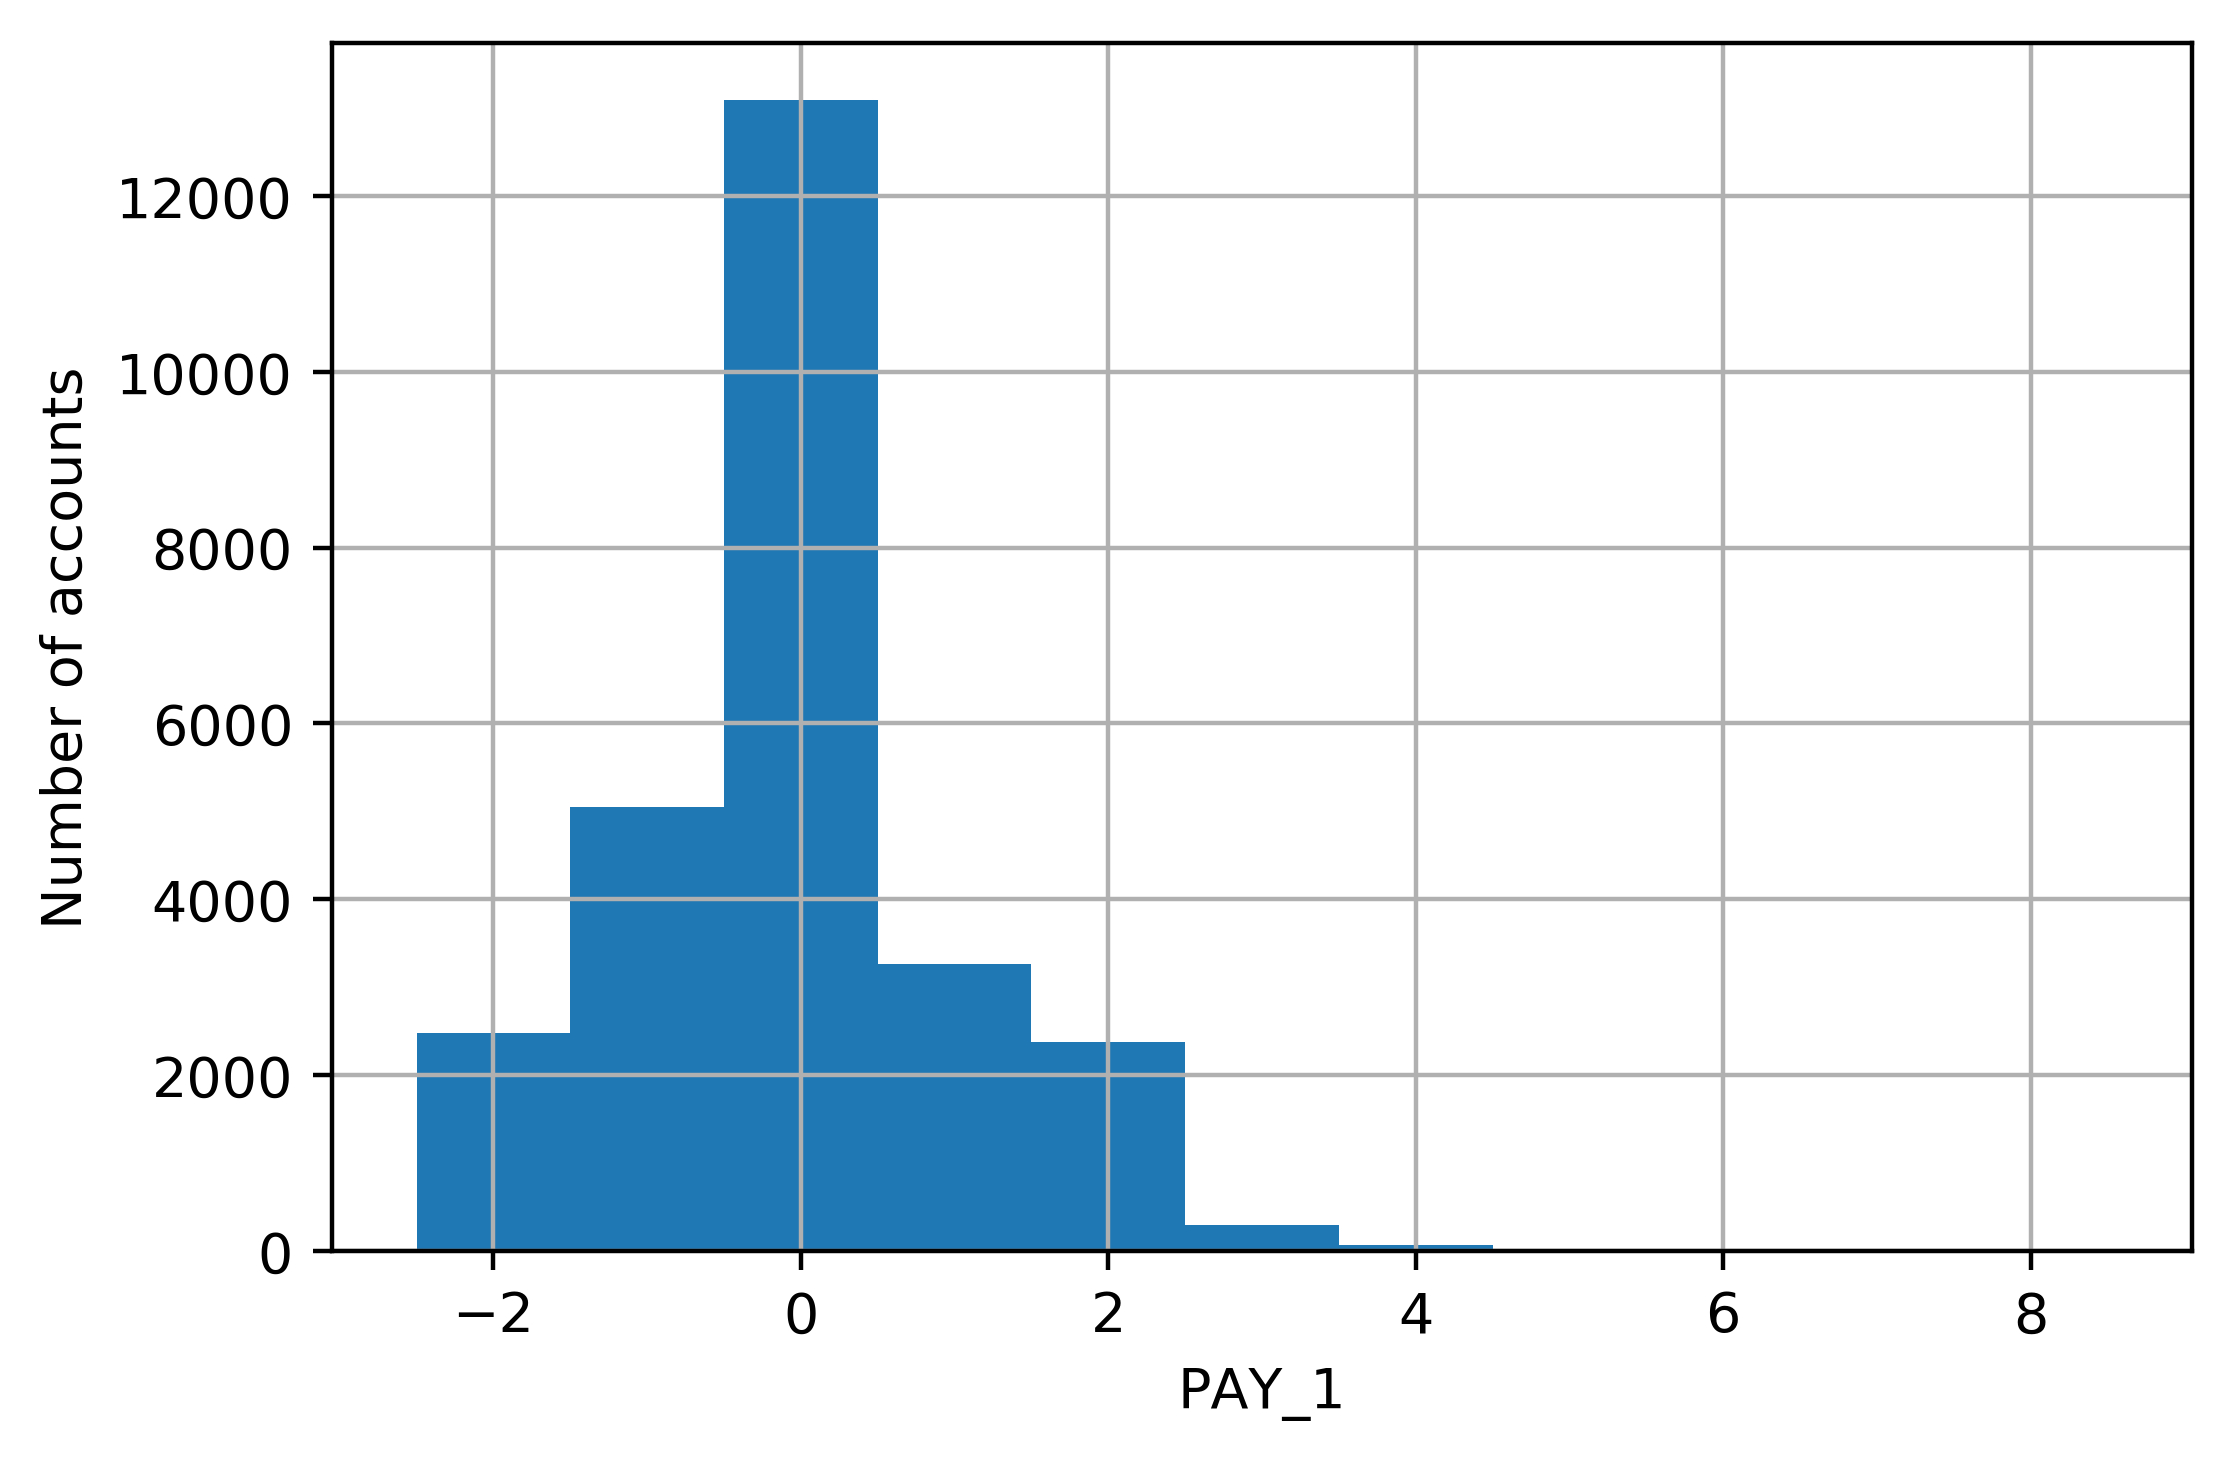

In [55]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C491FB4588>,
      dtype=object)

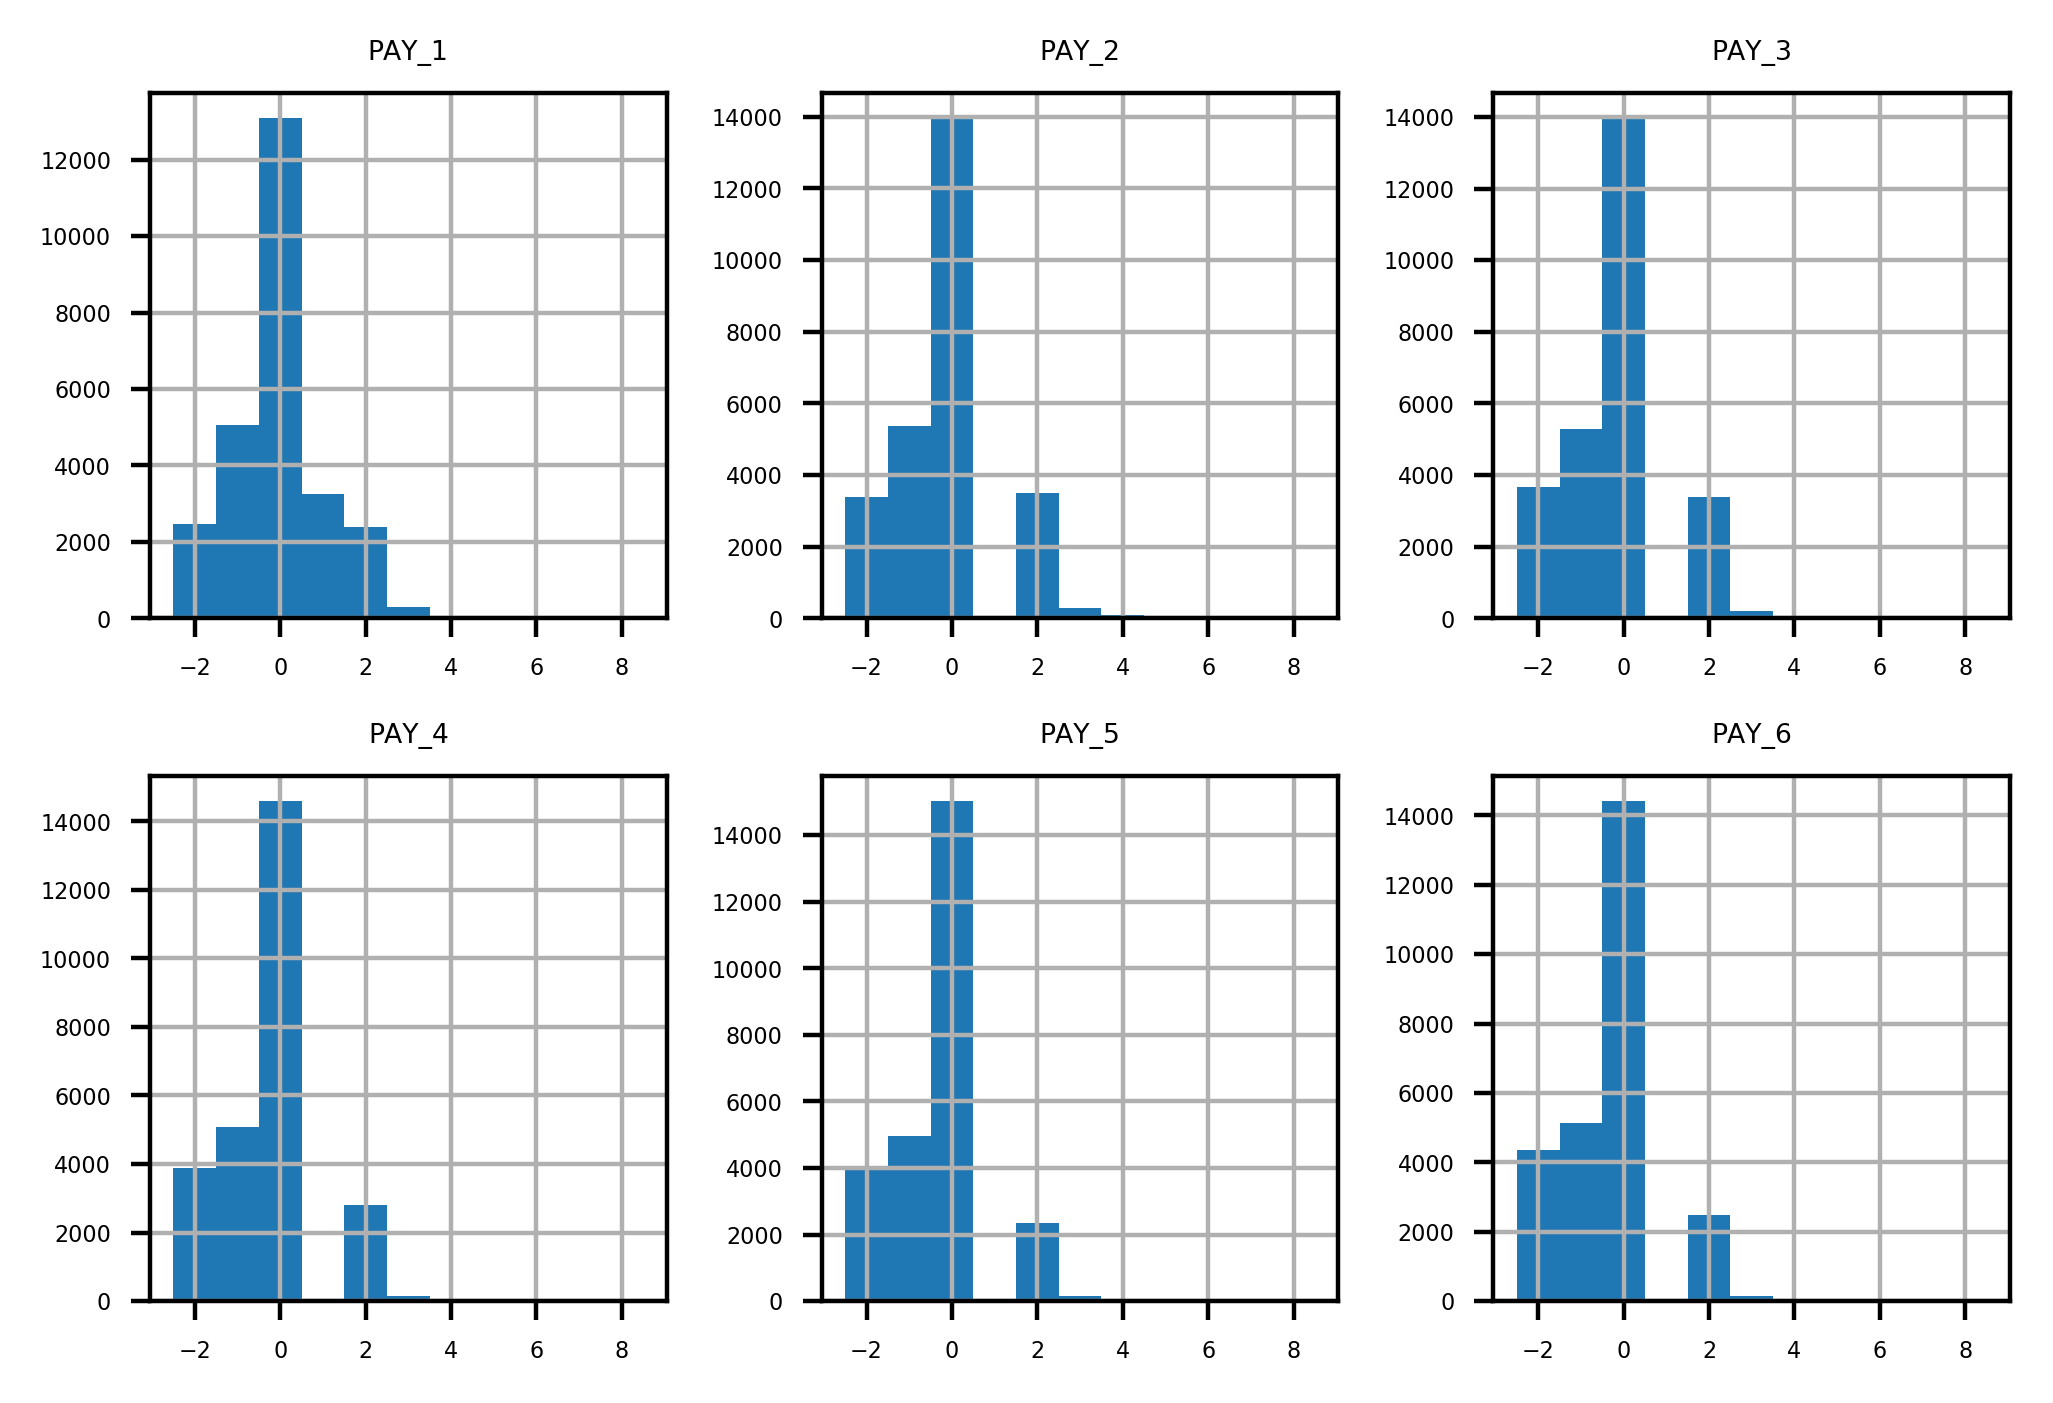

In [56]:
# plot histograms for all months in a 2 by 3 grid of plots
# adjusting font size for readablity
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

There are very few accounts with 1 month delay in July.  However, there are suddently thousands of accounts with a 2 month delay in August.  The only way to progress to a 2 month delay should be from a 1 month delay in the previous month.  Something is wrong here.

After checking with the client we found out that there were reporting issues up through September.  The PAY_1 feature is underreported in all months except Sep.  Only the most recent month of payment status data is correct.  We can only use PAY_1 as a feature in a predictive model, but not PAY_2 on up.  

In [57]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3'
                       ]].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


### Exploring Remeaining Financial Features

In [58]:
# list of remaining financial features
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [61]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C49229BEF0>,
      dtype=object)

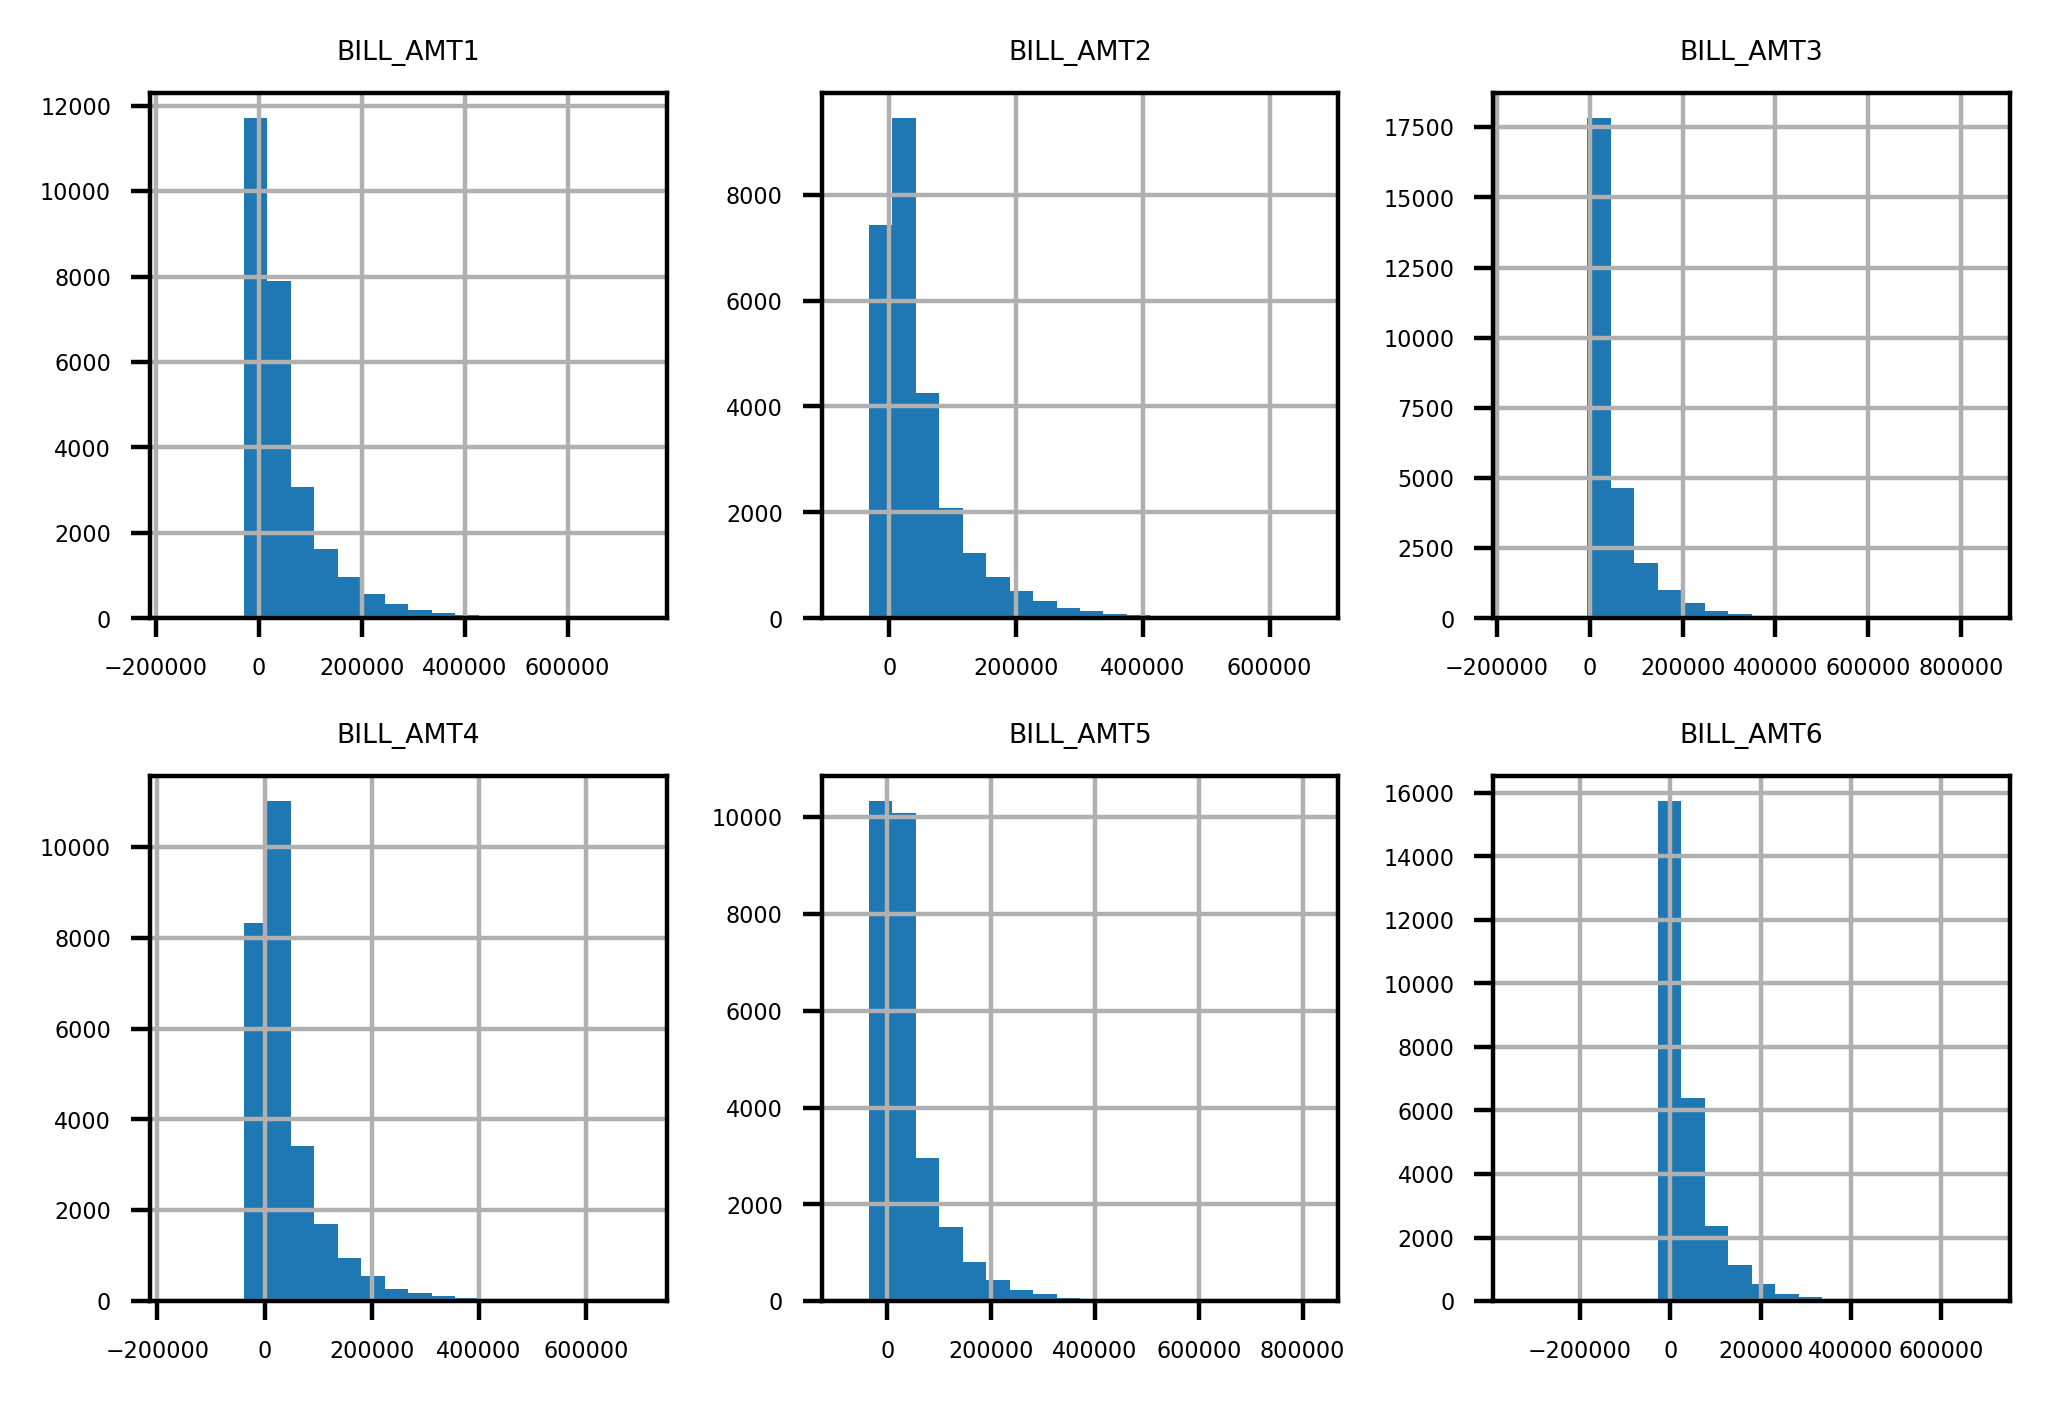

In [62]:
# histogram of bill payment features
df[bill_feats].hist(bins=20, layout=(2,3))

In [63]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4928B02B0>,
      dtype=object)

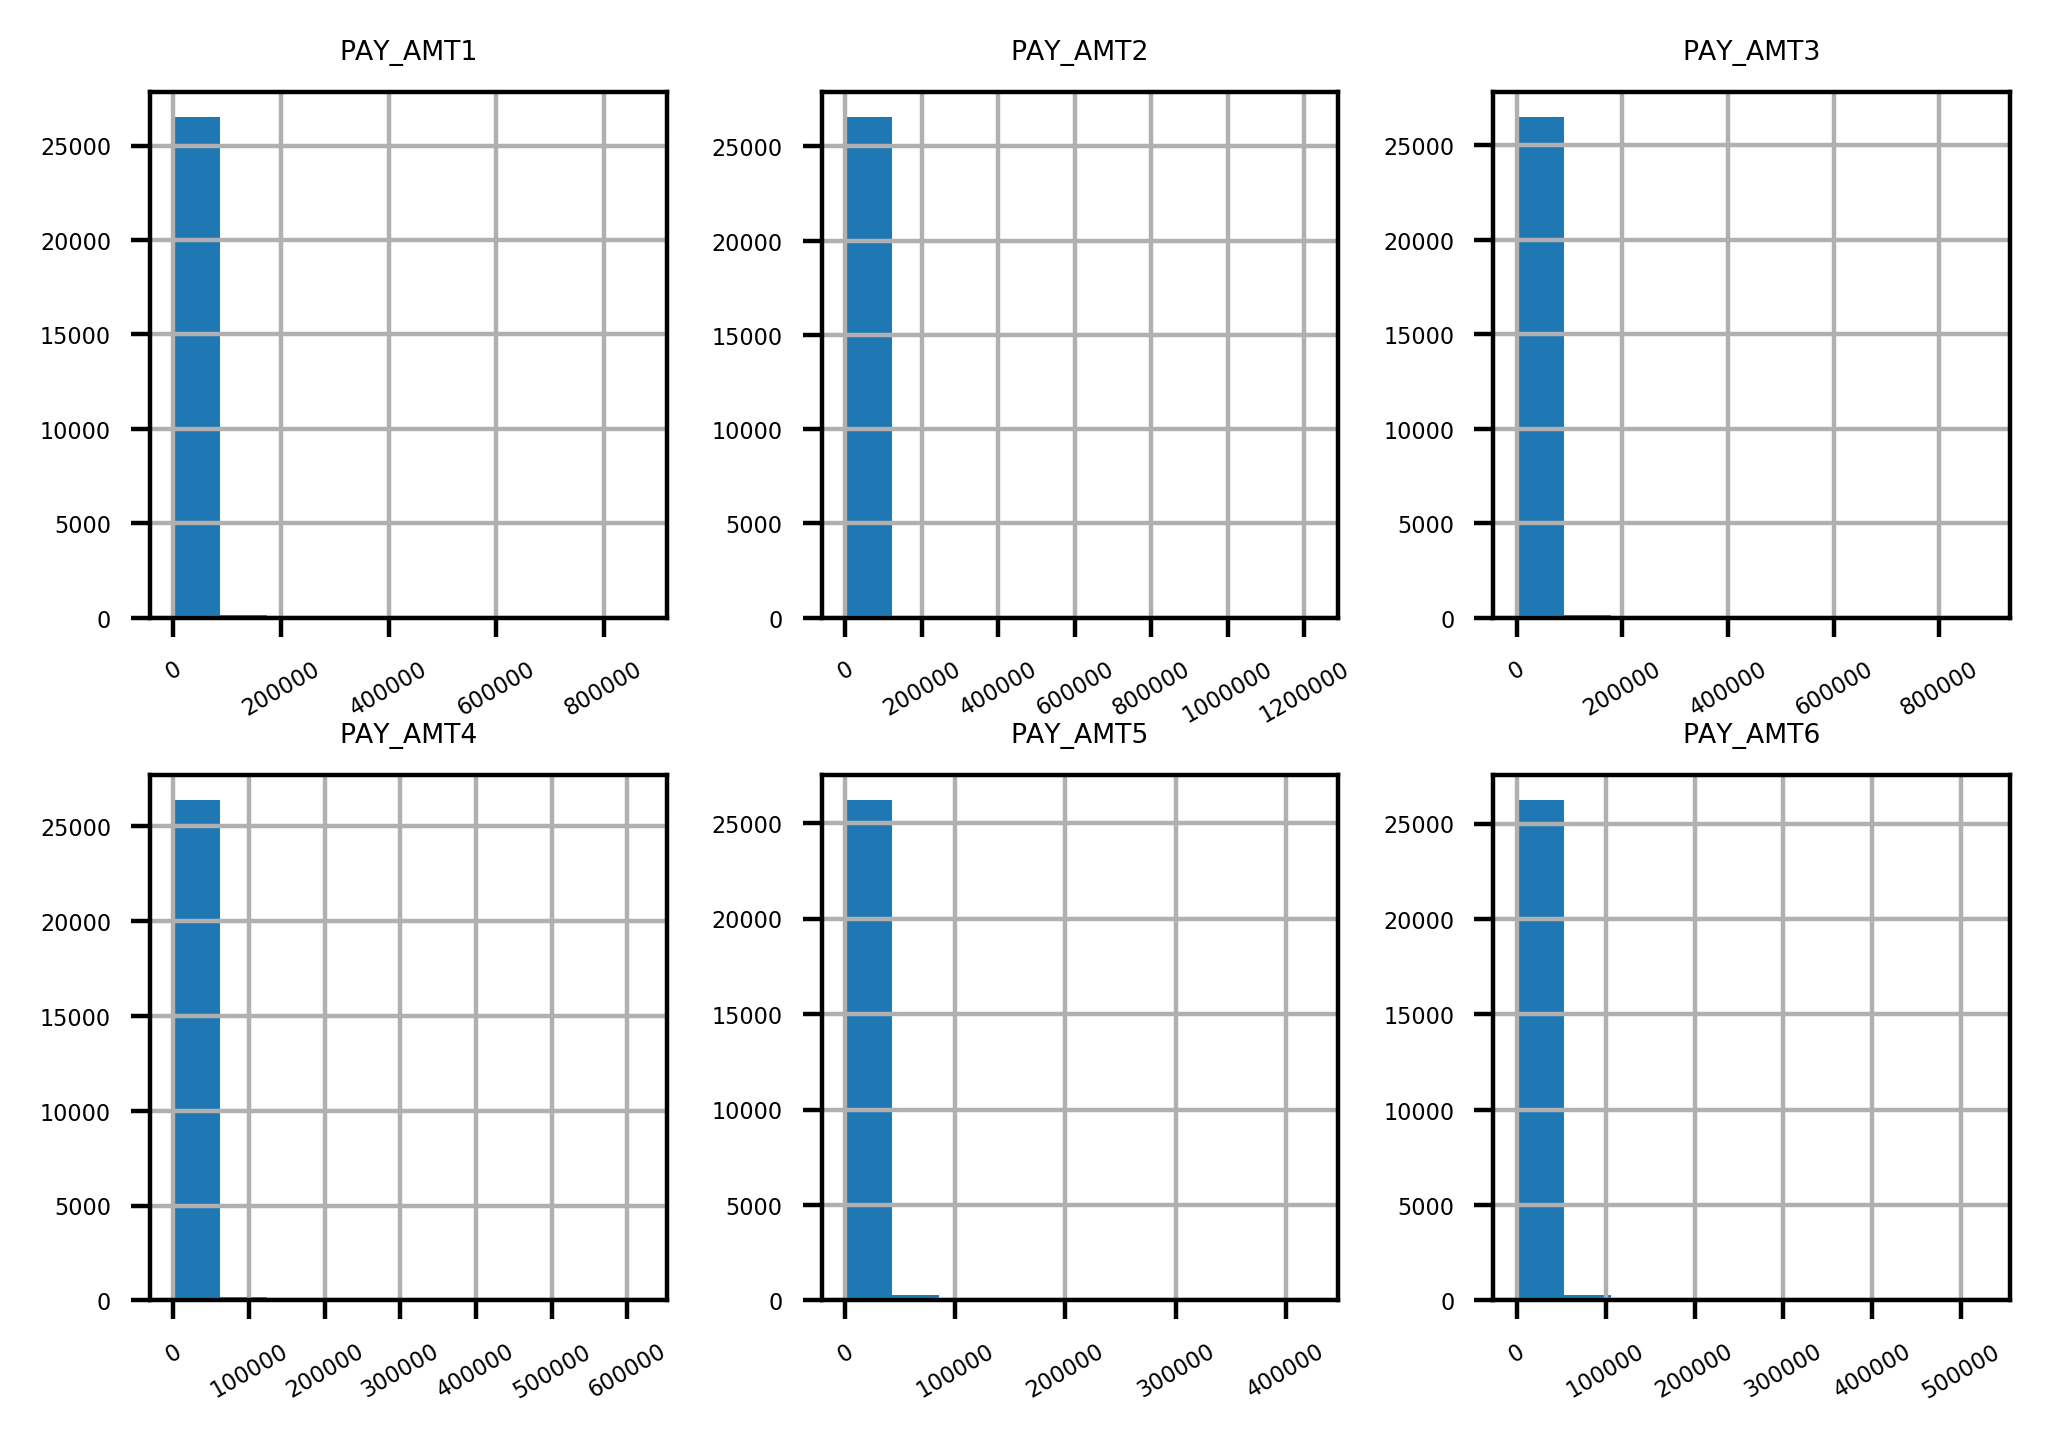

In [65]:
# histogram of payment amounts, use xrot to ensure x-axis labels do not overlap
df[pay_amt_feats].hist(layout=(2,3), xrot = 30)

In [66]:
# boolean mask for payment amounts
pay_zero_mask = df[pay_amt_feats] == 0

In [67]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [68]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C49390A780>,
      dtype=object)

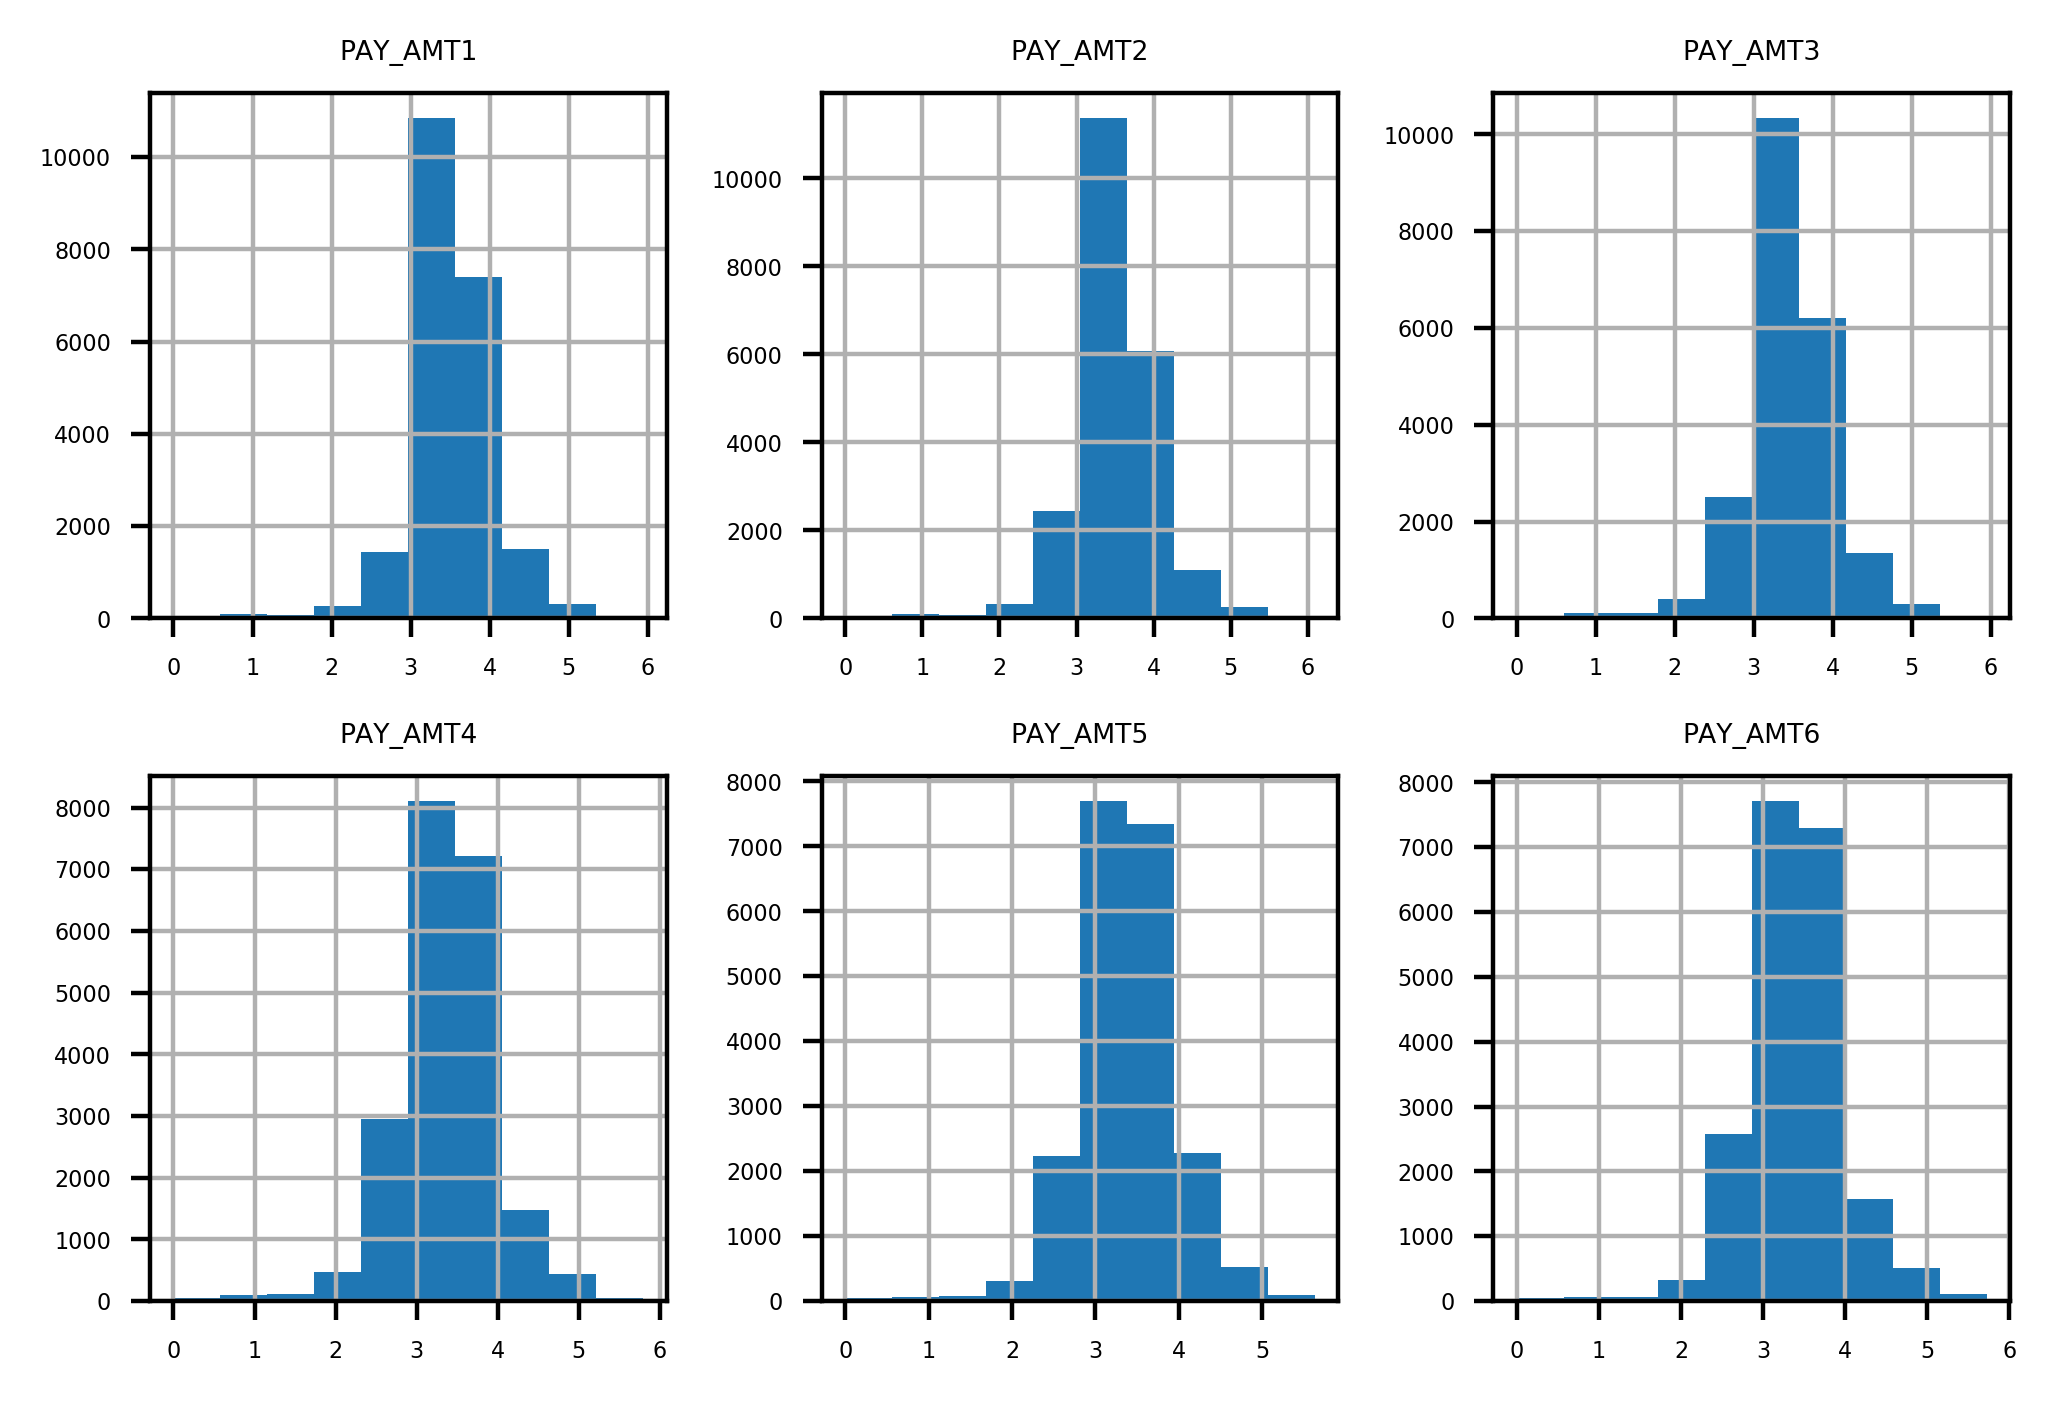

In [70]:
# histogram of non-zero payment amounts, using log10 scale
# applying the above mask to remove 0 values
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))